# Structures, Brillouin zones, and cut-planning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import peaks as pks
import os
import pint_xarray

# Set default options
xr.set_options(cmap_sequential='Purples', keep_attrs=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Set the default file path
pks.opts.FileIO.path = os.getenv('PEAKS_EXAMPLE_DATA_PATH')

## Loading structures
Handling structures and Brillouin zone plotting requires the `ase` package. This can be installed via `pip install ase` or optionally by specifying the `all` flag when installing `peaks`. **[TODO...]**

In [3]:
# Import some core ase functions (note, if just using the basic `peaks`` functions, this is not required)
import ase
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.build import make_supercell

Passing a `.cif` file to the main `pks.load` function will load an `atoms.Atoms` object via `ase.io.read`. The full suite of `ase` utilities can then be used, e.g., to plot and visualise this structure. A couple of simple examples are shown below; see the [ase documentation](https://wiki.fysik.dtu.dk/ase/).

In [4]:
atoms = pks.load('PdCoO2.cif')
#atoms = pks.load('/Users/philking/Downloads/1008659.cif')

In [5]:
# Interactive view of the sturcture
view(atoms)

<Popen: returncode: None args: ['/Users/philking/miniconda3/envs/peaks-dev/b...>

<Axes: >

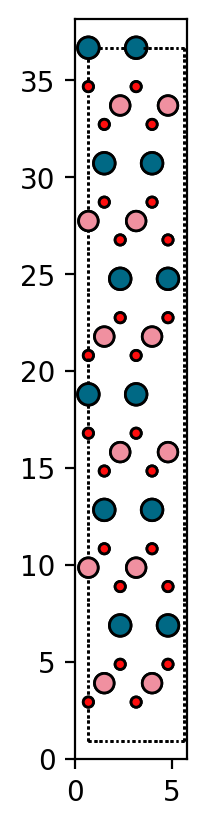

In [6]:
# Make a supercell and plot it
scell = make_supercell(atoms, [[2, 0, 0], [0, 2, 0], [0, 0, 2]])
plot_atoms(scell, radii=0.4, rotation='90x,90y,0z')

## Brillouin zone plotting
`peaks` implements a wrapper around `ase.lattice.plot_bz`, with scaling and configurations optimised for ARPES, and some helper methods (e.g. selecting specific surface orientations, rotating the BZ to align with measured axes etc.) built in.

In [7]:
from peaks.bz.plotting import plot_bz

The atoms object from a loaded `.cif` structure file can be passed directly, or a strucure built using standard `ase` methods. Alternatively, an `ase.lattice.BravaisLattice` object can be passed: 

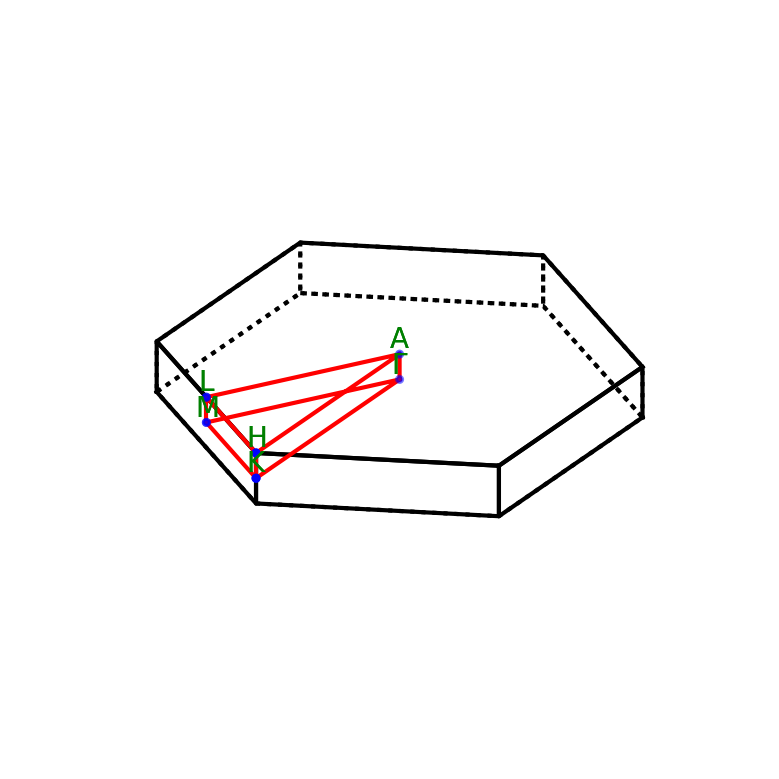

In [8]:
plot_bz(atoms, path=None)

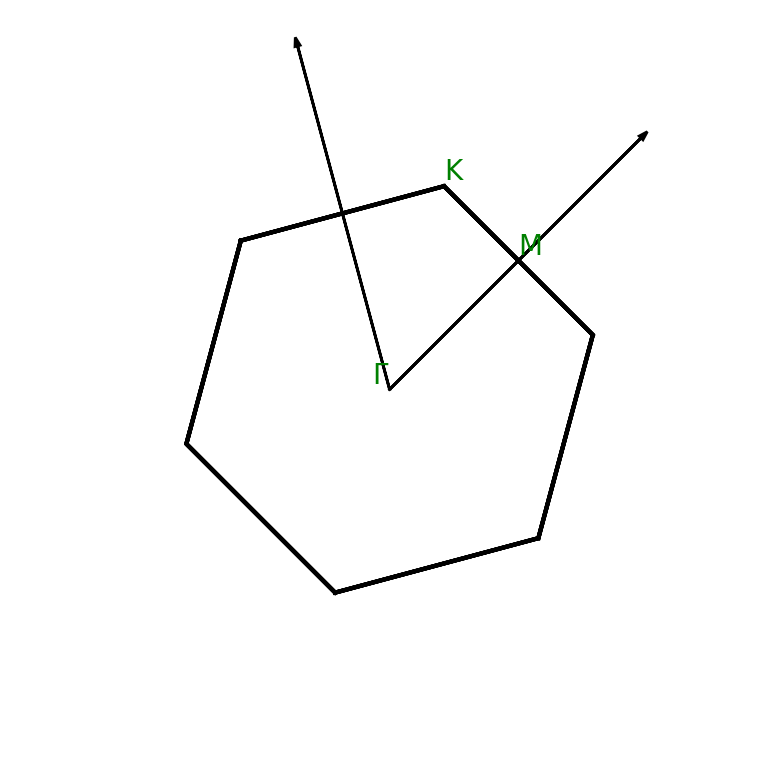

In [9]:
# Build a MoS2 example structure:
MoS2 = ase.build.mx2(formula='MoS2', a=3.5, size=(1, 1, 1), vacuum=None)
plot_bz(MoS2, vectors=True, rotate=15)

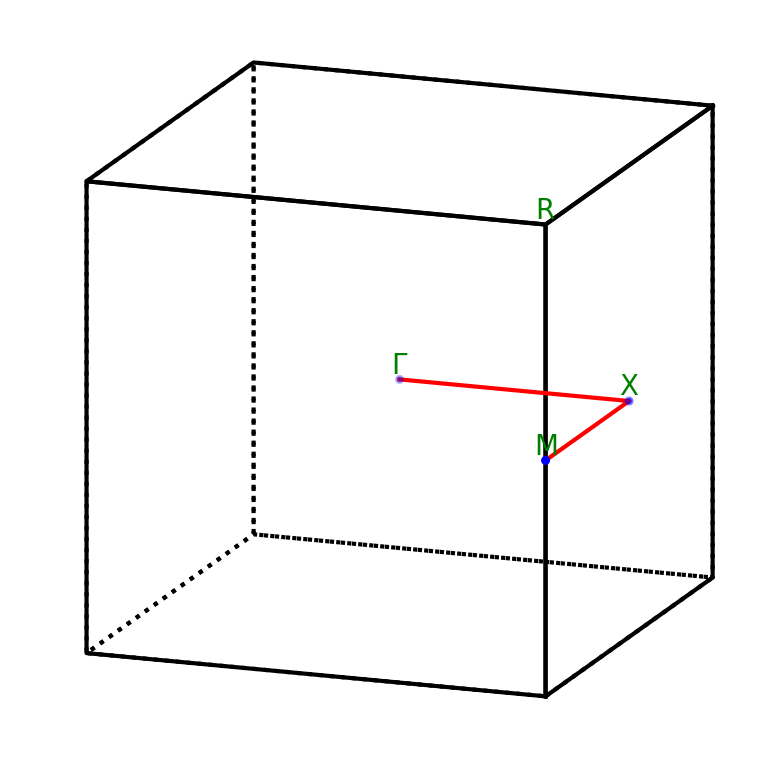

In [10]:
# Make a generic lattice
lattice = ase.lattice.CUB(a=3.8)
plot_bz(lattice, path='GXM', azim=20, elev=15)

You can pass a surface orientation to plot the corresponding surface Brillouin zone, repeating as desired

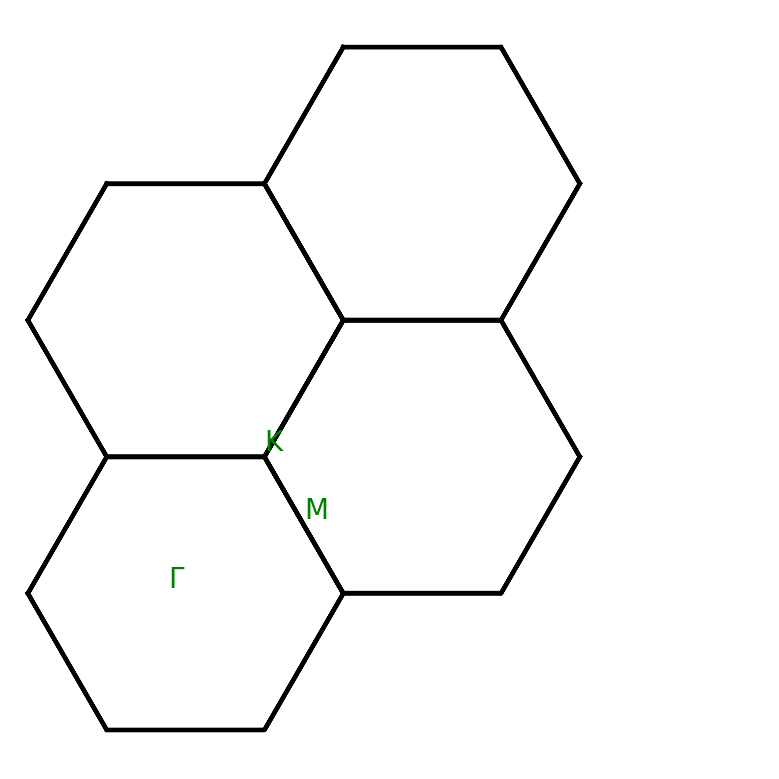

In [11]:
plot_bz(lattice, surface=(1,1,1), repeat=(2,2))

In [12]:
FS1 = pks.load('i05-59818.nxs')

[                                        ] | 0% Completed | 1.45 s


KeyboardInterrupt: 

In [17]:
FS1.metadata.set_normal_emission({'polar': '1.5 deg', 'tilt': '-0.08399999999999999 deg', 'azi': '-12.510000138999999 deg'})

In [ ]:
FS1.MDC()

In [19]:
FS1.disp()

## k-points

In [134]:
from peaks.bz.utils import sym_points

In [154]:
sym_points(atoms, surface=(0,0,1), hv=21.2)

,k_x,k_y,k_z,|k|,angle_along_slit @ 21.2 eV
G,0.000000,0.000000,0.0,0.000000,0.0
M,1.097008,0.633358,0.0,1.266716,37.2
K,0.731339,1.266716,0.0,1.462678,44.3


Basically want to load structure file via ASE or pymatgen and get ASE Atoms object. Then have some base methods:
- `plot_sbz(struct, surf=(001), rotate=0, ...)` to plot the surf BZ, with repeats and possible rotation
- `plot_bzslice(struct, surf=(001), k_perp=0, rotate=0, ...)` to plot a slice through a bulk BZ
- `plot_bz(struct)` to basically mirror the ASE fn

Instead of passing struct, also make it possible to pass a simple e.g. `hex`, `square` or similar, or maybe just the Bravis lattice from ASE directly?

Then need a couple of cut planner methods


In [14]:
from peaks.bz.plotting import plot_bz_section

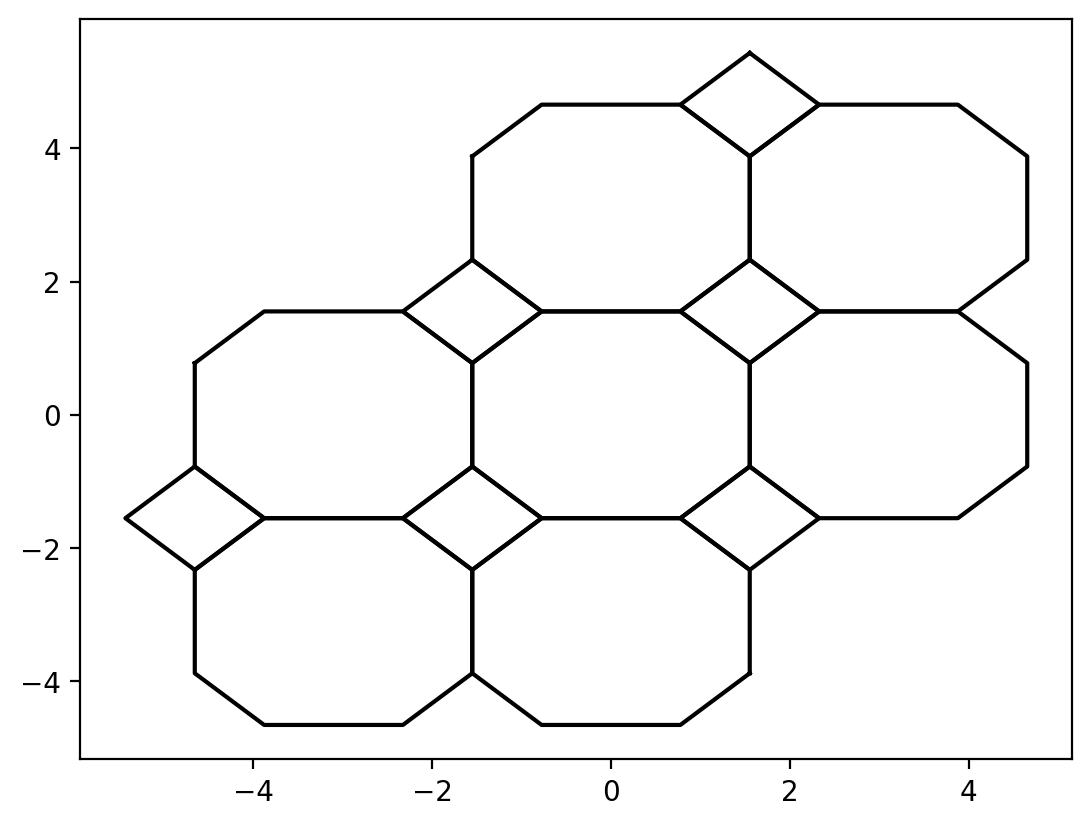

In [153]:
plot_bz_section(atoms, plane_normal=(0,0,1), plane_origin=(0,0,0), show=True)